In [1]:
import torch
import numpy as np

from utils.utils import *
from utils.dataloader import *
from utils.nop import *

import matplotlib.pyplot as plt

/home/marlon/miniconda3/envs/torch39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Data and model location
data_path = 'data/era5_Santos_2022-2023.nc'
bath_path = 'data/era5_Santos_2022-2023_bath.nc'

model_path_base = 'models/model_nm600_1250_ds300.0_r350.0_w20_kw40_d8_nc_rl.pt'

device = torch.device('cuda')

ncs = [100, 200, 500, 2552]
rls = [5, 10, 25, 50, 100, 200]

In [3]:
rl = []
loss = []
loss_val = []

for i in range(len(ncs)):
    rl_temp = []
    loss_temp = []
    loss_val_temp = []
    for j in range(len(rls)):
        try:
            model_path = model_path_base.replace('_nc',f'_nc{ncs[i]}').replace('_rl',f'_rl{rls[j]}').replace('_nc2552','')
            model_data = torch.load(model_path, map_location=device)
            loss_temp.append(model_data['loss'])
            loss_val_temp.append(model_data['loss_val'])
            rl_temp.append(rls[j])
            print(f'Found {model_path}')
        except:
            print(f'Missed {model_path}')

    loss.append(loss_temp)
    loss_val.append(loss_val_temp)
    rl.append(rl_temp)

Found models/model_nm600_1250_ds300.0_r350.0_w20_kw40_d8_nc100_rl5.pt
Found models/model_nm600_1250_ds300.0_r350.0_w20_kw40_d8_nc100_rl10.pt
Found models/model_nm600_1250_ds300.0_r350.0_w20_kw40_d8_nc100_rl25.pt
Found models/model_nm600_1250_ds300.0_r350.0_w20_kw40_d8_nc100_rl50.pt
Missed models/model_nm600_1250_ds300.0_r350.0_w20_kw40_d8_nc100_rl100.pt
Missed models/model_nm600_1250_ds300.0_r350.0_w20_kw40_d8_nc100_rl200.pt
Found models/model_nm600_1250_ds300.0_r350.0_w20_kw40_d8_nc200_rl5.pt
Found models/model_nm600_1250_ds300.0_r350.0_w20_kw40_d8_nc200_rl10.pt
Missed models/model_nm600_1250_ds300.0_r350.0_w20_kw40_d8_nc200_rl25.pt
Missed models/model_nm600_1250_ds300.0_r350.0_w20_kw40_d8_nc200_rl50.pt
Missed models/model_nm600_1250_ds300.0_r350.0_w20_kw40_d8_nc200_rl100.pt
Missed models/model_nm600_1250_ds300.0_r350.0_w20_kw40_d8_nc200_rl200.pt
Found models/model_nm600_1250_ds300.0_r350.0_w20_kw40_d8_nc500_rl5.pt
Found models/model_nm600_1250_ds300.0_r350.0_w20_kw40_d8_nc500_rl10.pt

In [4]:
rl

[[5, 10, 25, 50], [5, 10], [5, 10, 25, 50], [50, 100, 200]]

In [5]:
def rolling(a, n=11):
    # a is the input array, n is the window size
    kernel = np.ones(n) / n # create a kernel of ones with size n
    return np.exp(np.convolve(np.log(a), kernel, mode='valid'))
    #return a[::n]

/tmp/ipykernel_3290480/1228677834.py:4: RuntimeWarning: divide by zero encountered in log
  return np.exp(np.convolve(np.log(a), kernel, mode='valid'))


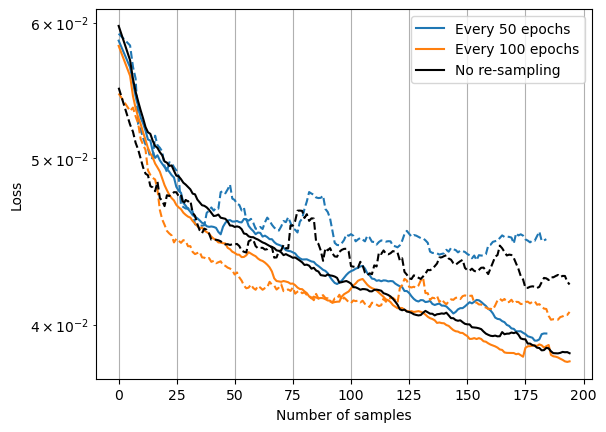

In [6]:
# Plot loss during training
i = 3

colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']

for j in range(len(rl[i])):
    epochs = rolling(range(len(loss[i][j])))
    if j == len(rl[i])-1:
        plt.semilogy(epochs,rolling(loss[i][j]),label='No re-sampling',color='k')
        plt.semilogy(epochs,rolling(loss_val[i][j]),'--',color='k')
    else:
        plt.semilogy(epochs,rolling(loss[i][j]),label=f'Every {rl[i][j]} epochs',color=colors[j])
        plt.semilogy(epochs,rolling(loss_val[i][j]),'--',color=colors[j])
plt.xlabel('Number of samples')
plt.ylabel('Loss')
plt.grid()
plt.legend()

/tmp/ipykernel_3290480/1228677834.py:4: RuntimeWarning: divide by zero encountered in log
  return np.exp(np.convolve(np.log(a), kernel, mode='valid'))


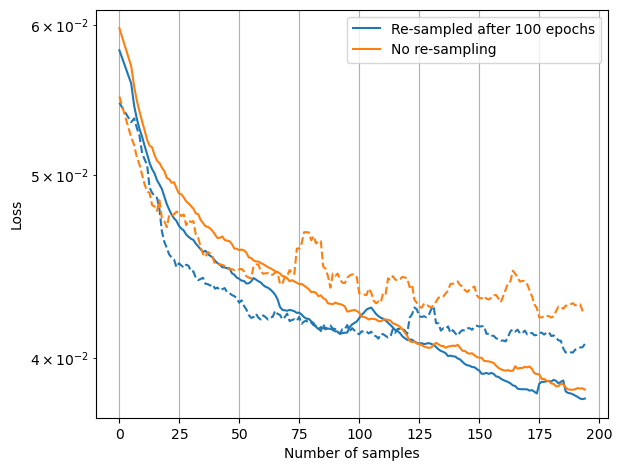

In [7]:
# Plot loss during training
i = 3

colors = ['','tab:blue','tab:orange']

j = 1
epochs = rolling(range(len(loss[i][j])))
plt.semilogy(epochs,rolling(loss[i][j]),label=f'Re-sampled after 100 epochs',color=colors[j])
plt.semilogy(epochs,rolling(loss_val[i][j]),'--',color=colors[j])

j = 2
epochs = rolling(range(len(loss[i][j])))
plt.semilogy(epochs,rolling(loss[i][j]),label='No re-sampling',color=colors[j])
plt.semilogy(epochs,rolling(loss_val[i][j]),'--',color=colors[j])

plt.xlabel('Number of samples')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.1)
plt.savefig('loss_resample.pdf')